1. Поскольку $f(t) = exp(t)$ --- непрерывное отображение и по ЦПТ $\bar x\to \mathbb{E}x_1=mp$, то ценка $\hat\theta=\exp(\bar x)$ есть оценка параметра $\theta_0(m,p)=\exp(mp)$.\
Покажем асимптотическую нормальность этой оценки

In [1]:
import numpy as np
import seaborn as sns
import numpy.random as rd
import matplotlib.pyplot as plt
import math
from IPython.display import display, Math
import scipy.stats as st

$x_1,\ldots, x_n$ ~ Bin(m, p)

$N$ --- число точек $\hat\theta_n$

Для того, чтобы показать асимптотическую нормальность, будем проверять, что

$$\sqrt{n}(\hat\theta_n - \theta) \sim N(0, \sigma(\theta))$$

Дисперию $\sigma(\theta)$ мы не знаем, но подберем...

In [52]:
import math


def thetas_gen(N, m, p, n):
    thetas = np.zeros(N)
    for i in range(N):
        thetas[i] = np.exp(np.mean(st.binom.rvs(m, p, size=n))) - np.exp(m*p)
    thetas *= np.sqrt(n)
    return thetas

def density_gen(thetas, N):
    points = np.unique(thetas)
    jumps = np.zeros(points.shape[0])
    for i in range(points.shape[0]):
        jumps[i] = np.sum(thetas == points[i])/N
    for i in range(1, points.shape[0]):
        jumps[i] += jumps[i-1]
    return points, jumps

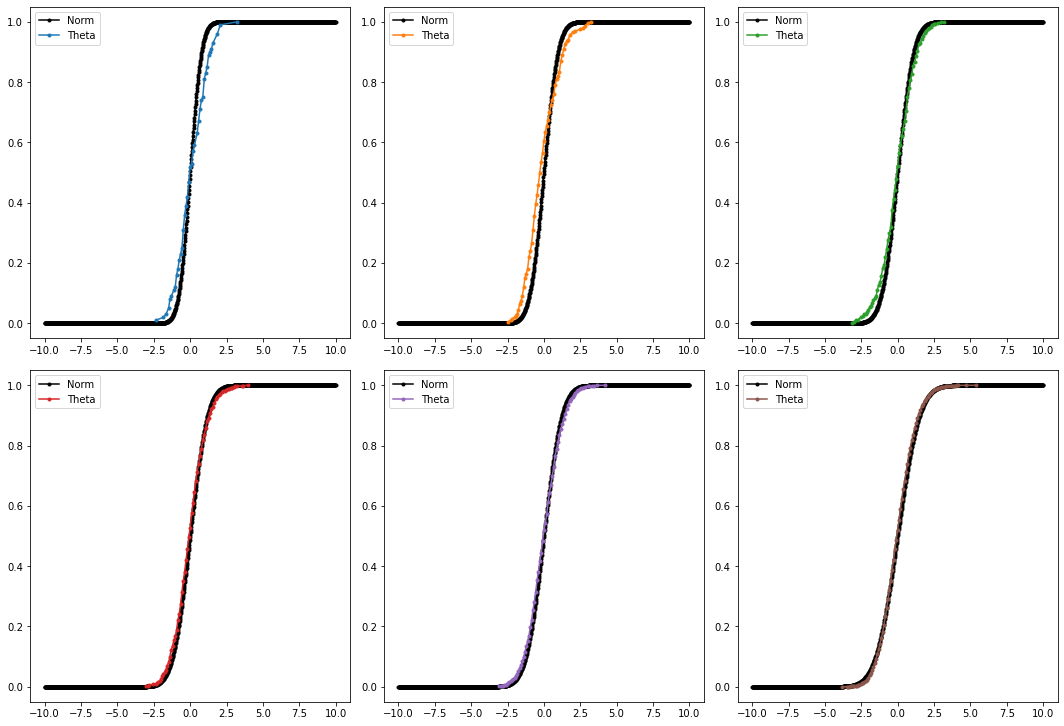

In [66]:
n = 300

m = 5
p = 0.1
mp = m*p


plt.figure(figsize=(15, 15))
cmap = plt.get_cmap("tab10").colors


for k, N in enumerate([100, 200, 500, 1000, 2000, 10000]):

    plt.subplot(3, 3, k+1)
    plt.tight_layout()
    
    thetas = thetas_gen(N, m, p, n)
    thetas_x, thetas_y = density_gen(thetas, N)
    thetas_std = np.std(thetas_x)
    
    left, right = thetas_x[0], thetas_x[-1]
    X = np.linspace(-10, 10, num = 1000)
    y = np.array([st.norm.cdf(x, loc=0, scale=thetas_std * mp) for x in X])   # тут умножается на 0,5!
    
    
    
    plt.plot(X, y, '.-', c='k', label="Norm")
    plt.plot(thetas_x, thetas_y, '.-',color=cmap[k], label="Theta")
    plt.legend()
plt.show()

Видно, что асимптотическая нормальность достигается для $\theta(m, p) = e^{0.5}$


Теперь покажем асимптотическую несмещенность:
$$\mathbb{E}\hat\theta_n - e^{mp}\to 0$$

In [72]:
def thetas_mean(N, m, p, n):
    thetas = np.zeros(N)
    limit = np
    for i in range(N):
        thetas[i] = np.abs(np.exp(np.mean(st.binom.rvs(m, p, size=n))) - np.exp(m*p))
    return np.mean(thetas)

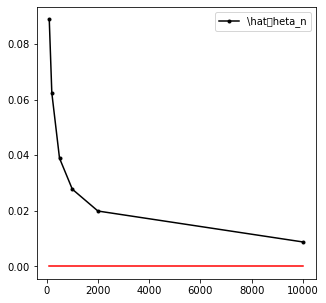

In [76]:
# cmap = plt.get_cmap("tab10").colors

plt.figure(figsize=(5, 5))



lst = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]


plt.tight_layout()

y = [thetas_mean(N, m, p, n) for n in lst]

plt.plot(lst, y, '.-', c='k', label="\hat\theta_n")
plt.plot(lst, [0 for i in lst], '-', c='r')


#plt.xticks(x, x)
# plt.xlabel("k")
# plt.ylabel(r"$P(\xi _n=k)$")
plt.legend()
plt.show()

Видно, что смещение асимптотически стремится к нулю